<a href="https://colab.research.google.com/github/riponalmamun/MangoLeafBD/blob/main/MangoLeafBD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import os
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder

In [3]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Assuming dataset is in 'data_dir'
data_dir = '/content/drive/MyDrive/MangoLeafBD Dataset'


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
# Function to load images and labels
def load_images_labels(data_dir):
    images, labels = [], []
    for category in os.listdir(data_dir):
        category_path = os.path.join(data_dir, category)
        for img_file in os.listdir(category_path):
            img_path = os.path.join(category_path, img_file)
            img = cv2.imread(img_path)
            img = cv2.resize(img, (100, 100))  # Resize for consistency
            images.append(img)
            labels.append(category)
    return np.array(images), np.array(labels)

In [5]:
# Load data
images, labels = load_images_labels(data_dir)

In [6]:
# EDA: Data Overview
print(f"Total Images: {images.shape[0]}")
print(f"Image Dimensions: {images.shape[1:]}")
print(f"Unique Labels: {np.unique(labels)}")

Total Images: 4000
Image Dimensions: (100, 100, 3)
Unique Labels: ['Anthracnose' 'Bacterial Canker' 'Cutting Weevil' 'Die Back' 'Gall Midge'
 'Healthy' 'Powdery Mildew' 'Sooty Mould']


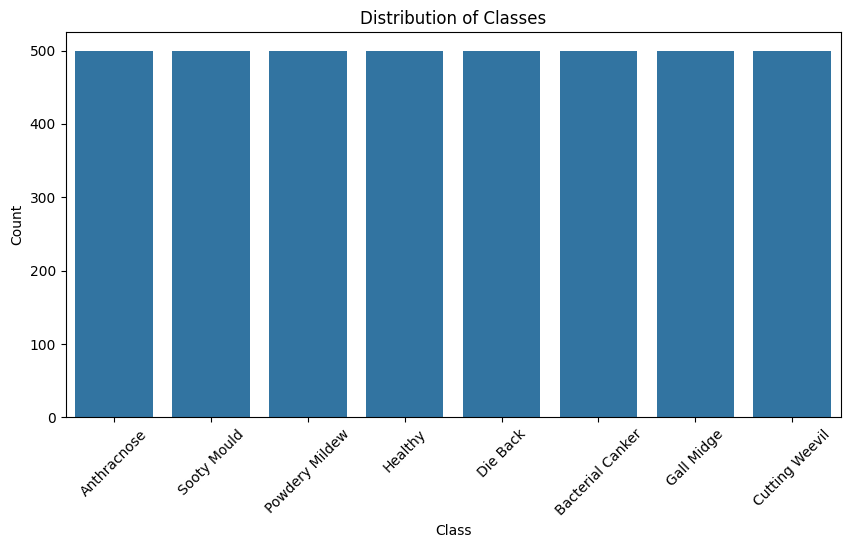

In [7]:
# EDA: Class Distribution
plt.figure(figsize=(10, 5))
sns.countplot(x=labels)
plt.title("Distribution of Classes")
plt.xlabel("Class")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

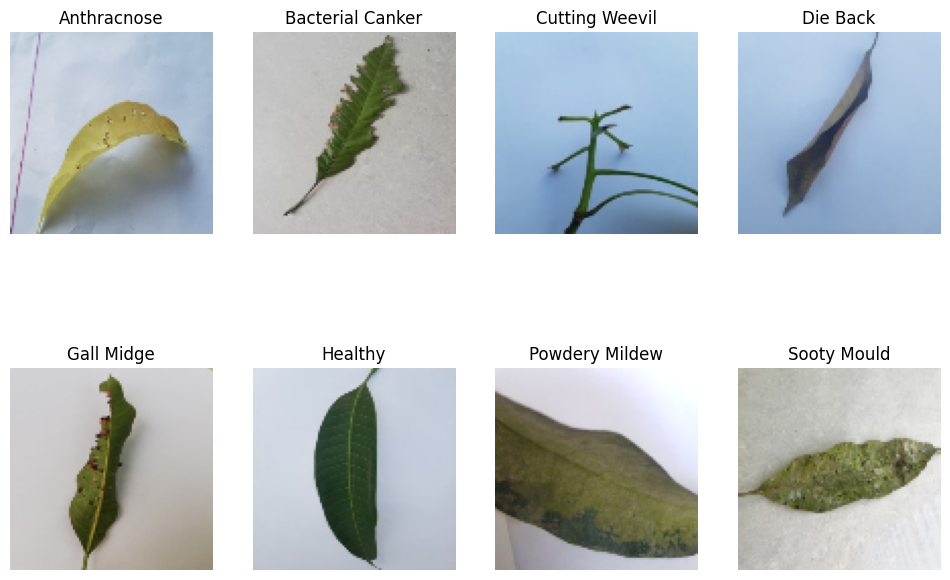

In [8]:
# EDA: Sample Visualization
def display_samples(images, labels):
    plt.figure(figsize=(12, 8))
    unique_labels = np.unique(labels)
    for i, label in enumerate(unique_labels):
        plt.subplot(2, 4, i+1)
        idx = np.where(labels == label)[0][0]
        plt.imshow(cv2.cvtColor(images[idx], cv2.COLOR_BGR2RGB))
        plt.title(label)
        plt.axis('off')
    plt.show()

display_samples(images, labels)

In [9]:
# Data Preprocessing
# Normalize images
images = images / 255.0

In [10]:
# Encoding labels
le = LabelEncoder()
encoded_labels = le.fit_transform(labels)

In [11]:
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(images.reshape(images.shape[0], -1),
                                                    encoded_labels,
                                                    test_size=0.2,
                                                    random_state=42)

In [12]:
# Model 1: Decision Tree
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)

In [14]:
# Model 2: Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

In [15]:
# Evaluation
print("Decision Tree Classification Report:")
print(classification_report(y_test, y_pred_dt, target_names=le.classes_))
print("\nRandom Forest Classification Report:")
print(classification_report(y_test, y_pred_rf, target_names=le.classes_))


Decision Tree Classification Report:
                  precision    recall  f1-score   support

     Anthracnose       0.68      0.62      0.65       123
Bacterial Canker       0.77      0.72      0.75        90
  Cutting Weevil       0.90      0.98      0.94        93
        Die Back       0.79      0.84      0.81       104
      Gall Midge       0.51      0.59      0.55        91
         Healthy       0.65      0.60      0.63       101
  Powdery Mildew       0.71      0.64      0.67       112
     Sooty Mould       0.42      0.45      0.44        86

        accuracy                           0.68       800
       macro avg       0.68      0.68      0.68       800
    weighted avg       0.68      0.68      0.68       800


Random Forest Classification Report:
                  precision    recall  f1-score   support

     Anthracnose       0.93      0.90      0.91       123
Bacterial Canker       0.89      0.84      0.87        90
  Cutting Weevil       0.99      1.00      0.99    

In [16]:
# Accuracy Comparison
accuracy_dt = accuracy_score(y_test, y_pred_dt)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Decision Tree Accuracy: {accuracy_dt:.2f}")
print(f"Random Forest Accuracy: {accuracy_rf:.2f}")

Decision Tree Accuracy: 0.68
Random Forest Accuracy: 0.90


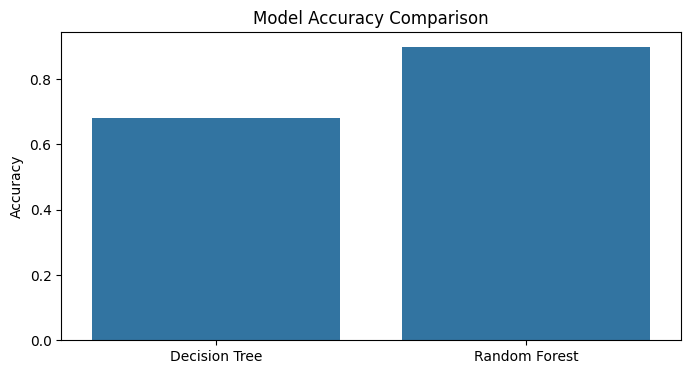

In [17]:
# Plot accuracy comparison
plt.figure(figsize=(8, 4))
sns.barplot(x=['Decision Tree', 'Random Forest'], y=[accuracy_dt, accuracy_rf])
plt.title('Model Accuracy Comparison')
plt.ylabel('Accuracy')
plt.show()